<a href="https://colab.research.google.com/github/ravitata/tensorflow2/blob/master/w2_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

In [5]:
print(diabetes_data.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [6]:
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [7]:
data = diabetes_data['data']
target = diabetes_data['target']

In [8]:
#target
target = (target - target.mean(axis=0))/target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [9]:
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size=0.1, random_state=1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)


(397, 10)
(45, 10)
(397,)
(45,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
def get_model(input_shape):
  model = Sequential([
                      Dense(128, activation='relu', input_shape=input_shape),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(1)
  ])
  return model

In [13]:
model = get_model((train_data.shape[1],))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
#print(model.weights)
print('input shape = ',model.input_shape)
print('metrics = ', model.metrics_names)

input shape =  (None, 10)
metrics =  []


In [17]:
loss, mae = model.evaluate(train_data, train_targets)
print('loss= ', loss)
print('mae= ', mae)

13/13 [==============================] - 0s 2ms/step - loss: 1.0202 - mae: 0.8668
loss=  1.0201833248138428
mae=  0.8668111562728882


In [18]:
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 10ms/step - loss: 0.9995 - mae: 0.8564 - val_loss: 1.0877 - val_mae: 0.8885
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9212 - mae: 0.8175 - val_loss: 0.9825 - val_mae: 0.8336
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7346 - mae: 0.7129 - val_loss: 0.7796 - val_mae: 0.7086
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5920 - mae: 0.6262 - val_loss: 0.5286 - val_mae: 0.5713
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5050 - mae: 0.5834 - val_loss: 0.8158 - val_mae: 0.7479
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5120 - mae: 0.5796 - val_loss: 0.4770 - val_mae: 0.5422
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4744 - mae: 0.5527 - val_loss: 0.5480 - val_mae: 0.5880
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4407 - mae: 0.5394 - va

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.DataFrame(history.history)

In [21]:
df.head()

,loss,mae,val_loss,val_mae
0,0.999523,0.856371,1.087698,0.888514
1,0.921151,0.817454,0.982476,0.833603
2,0.734578,0.712948,0.779573,0.708626
3,0.592040,0.626210,0.528627,0.571335
4,0.505024,0.583379,0.815758,0.747945


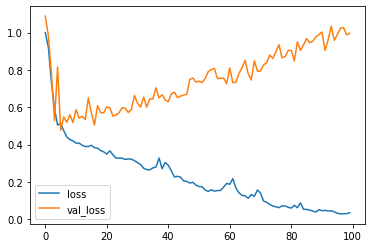

In [22]:
df[['loss', 'val_loss']].plot()
plt.show()


In [23]:
loss, mae = model.evaluate(test_data, test_targets, verbose=2)
print('loss= ', loss)
print('mae= ', mae)

2/2 - 0s - loss: 0.7719 - mae: 0.6537
loss=  0.7718809247016907
mae=  0.6536576151847839


In [24]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.7719 - mae: 0.6537


[0.7718809247016907, 0.6536576151847839]

## Regularization and Dropout

In [25]:
tf.keras.backend.clear_session()

In [26]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

In [27]:
def get_model(input_shape, wd, dr):
  model = Sequential([
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu', input_shape=input_shape),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(1)
  ])
  return model

In [28]:
weight_decay = 1e-3  #l2 regularization param
dropout_rate = 0.3
model=get_model((train_data.shape[1],), weight_decay, dropout_rate)

In [29]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [30]:
history = model.fit(train_data,train_targets, epochs = 100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 1.6415 - mae: 0.8606 - val_loss: 1.7122 - val_mae: 0.8997
Epoch 2/100
6/6 - 0s - loss: 1.5823 - mae: 0.8581 - val_loss: 1.6608 - val_mae: 0.8995
Epoch 3/100
6/6 - 0s - loss: 1.5225 - mae: 0.8518 - val_loss: 1.5968 - val_mae: 0.8912
Epoch 4/100
6/6 - 0s - loss: 1.4553 - mae: 0.8386 - val_loss: 1.5124 - val_mae: 0.8689
Epoch 5/100
6/6 - 0s - loss: 1.3481 - mae: 0.7998 - val_loss: 1.3536 - val_mae: 0.8023
Epoch 6/100
6/6 - 0s - loss: 1.1602 - mae: 0.7257 - val_loss: 1.1285 - val_mae: 0.6772
Epoch 7/100
6/6 - 0s - loss: 1.0767 - mae: 0.6953 - val_loss: 1.0173 - val_mae: 0.6171
Epoch 8/100
6/6 - 0s - loss: 0.9783 - mae: 0.6372 - val_loss: 1.0112 - val_mae: 0.6549
Epoch 9/100
6/6 - 0s - loss: 0.9030 - mae: 0.6097 - val_loss: 0.8840 - val_mae: 0.6062
Epoch 10/100
6/6 - 0s - loss: 0.8940 - mae: 0.6177 - val_loss: 0.8693 - val_mae: 0.5939
Epoch 11/100
6/6 - 0s - loss: 0.9085 - mae: 0.6145 - val_loss: 0.8812 - val_mae: 0.6005
Epoch 12/100
6/6 - 0s - loss: 0.9166 - ma

In [31]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.7129 - mae: 0.6175


[0.7128936648368835, 0.6174980401992798]

In [32]:
df = pd.DataFrame(history.history)

In [33]:
df.head()

,loss,mae,val_loss,val_mae
0,1.641486,0.860641,1.712220,0.899657
1,1.582297,0.858085,1.660785,0.899456
2,1.522503,0.851824,1.596806,0.891186
3,1.455326,0.838647,1.512368,0.868858
4,1.348069,0.799807,1.353554,0.802259


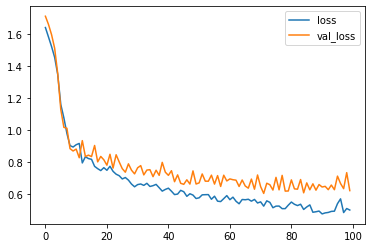

In [34]:
#No Dropout layer
df[['loss', 'val_loss']].plot()
plt.show()

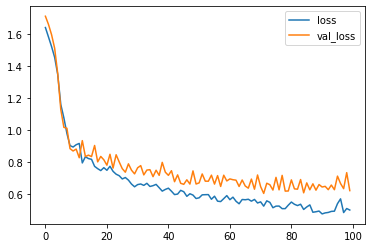

In [35]:
#With Dropout late and rate = 0.3
df[['loss', 'val_loss']].plot()
plt.show()

## Callback example

In [36]:
tf.keras.backend.clear_session()

In [37]:
from tensorflow.keras.callbacks import Callback

class myCallback(Callback):

  #Training methods
  def on_train_begin(self, logs=None):
    print(f"Starting Training...")

  def on_train_end(self, logs=None):
    print(f"Finishing Training...")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Starting batch {batch}")

  def on_train_batch_end(self, batch, logs=None):
    print(f"Finishing batch {batch}")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finishing epoch {epoch}")

  # Testing methods
  def on_test_begin(self, logs=None):
    print(f"Starting Testing...")

  def on_test_end(self, logs=None):
    print(f"Finishing Testing...")

  def on_test_batch_begin(self, batch, logs=None):
    print(f"Starting batch {batch}")

  def on_test_batch_end(self, batch, logs=None):
    print(f"Finishing batch {batch}")

  # Predicting methods
  def on_predict_begin(self, logs=None):
    print(f"Starting prediction...")

  def on_predict_end(self, logs=None):
    print(f"Finishing prediction...")

  def on_predict_batch_begin(self, batch, logs=None):
    print(f"Starting predict batch {batch}")

  def on_predict_batch_end(self, batch, logs=None):
    print(f"Finishing predict batch {batch}")

In [38]:
def get_regularized_model(input_shape, wd, dr):
  model = Sequential([
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu', input_shape=input_shape),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(128, kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'),
                      Dropout(dr),
                      Dense(1)
  ])
  return model

In [39]:
weight_decay = 1e-3  #l2 regularization param
dropout_rate = 0.3
model=get_regularized_model((train_data.shape[1],), weight_decay, dropout_rate)

In [40]:
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [41]:
history=model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[myCallback()])

Starting Training...
Starting epoch 0
Starting batch 0
Finishing batch 0
Starting batch 1
Finishing batch 1
Starting batch 2
Finishing batch 2
Starting batch 3
Finishing batch 3
Finishing epoch 0
Starting epoch 1
Starting batch 0
Finishing batch 0
Starting batch 1
Finishing batch 1
Starting batch 2
Finishing batch 2
Starting batch 3
Finishing batch 3
Finishing epoch 1
Starting epoch 2
Starting batch 0
Finishing batch 0
Starting batch 1
Finishing batch 1
Starting batch 2
Finishing batch 2
Starting batch 3
Finishing batch 3
Finishing epoch 2
Finishing Training...


In [42]:
model.evaluate(test_data, verbose=False, callbacks=[myCallback()])

Starting Testing...
Starting batch 0
Finishing batch 0
Starting batch 1
Finishing batch 1
Finishing Testing...


[0.5535830855369568, 0.0]

In [43]:
predictions=model.predict(test_data, verbose=False, callbacks=[myCallback()])

Starting prediction...
Starting predict batch 0
Finishing predict batch 0
Starting predict batch 1
Finishing predict batch 1
Finishing prediction...


In [44]:
predictions

array([[-0.05182554],
       [-0.08110715],
       [-0.03210969],
       [-0.0820962 ],
       [-0.02145369],
       [-0.01552662],
       [-0.00142031],
       [-0.06147646],
       [-0.05364781],
       [-0.05640314],
       [-0.0233141 ],
       [-0.01230924],
       [-0.06858846],
       [-0.07394408],
       [-0.01441255],
       [-0.01943195],
       [-0.02162512],
       [-0.06133312],
       [-0.03890954],
       [-0.02280325],
       [-0.01465667],
       [-0.07579491],
       [-0.06494901],
       [-0.08059184],
       [-0.07276639],
       [-0.02493646],
       [-0.07880595],
       [-0.04540741],
       [-0.03250075],
       [-0.01419678],
       [-0.02556477],
       [-0.02689278],
       [-0.02572667],
       [-0.0823293 ],
       [-0.06374709],
       [-0.01048757],
       [-0.07656167],
       [-0.00649865],
       [-0.01595661],
       [-0.01220381],
       [-0.06008701],
       [-0.04907537],
       [-0.06683304],
       [-0.05947348],
       [-0.0635388 ]], dtype=flo

# Early Stopping

In [45]:
tf.keras.backend.clear_session()

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
weight_decay = 1e-3  #l2 regularization param
dropout_rate = 0.3
model=get_regularized_model((train_data.shape[1],), weight_decay, dropout_rate)

In [48]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [49]:
myEarlyStopping = EarlyStopping(patience=10, min_delta=0.01)

hist=model.fit(train_data, train_targets, epochs=100, verbose=False,
               validation_split=0.15,
               callbacks=[myEarlyStopping])

In [50]:
df = pd.DataFrame(hist.history)
df.head()

,loss,mae,val_loss,val_mae
0,1.622725,0.859033,1.683828,0.899679
1,1.524530,0.848817,1.567653,0.879289
2,1.368428,0.810943,1.323538,0.780796
3,1.160229,0.714281,1.049553,0.618706
4,1.020389,0.657015,1.105405,0.706535


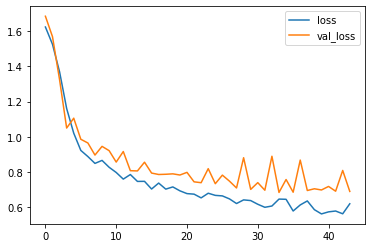

In [51]:
df[['loss', 'val_loss']].plot()
plt.show()

# Learing Rate Scheduler

In [54]:
tf.keras.backend.clear_session()

In [67]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_function (epoch, lr):
  lr = 1/(3+epoch * 5)
  return lr

In [68]:
weight_decay = 1e-3  #l2 regularization param
dropout_rate = 0.3
model=get_regularized_model((train_data.shape[1],), weight_decay, dropout_rate)

In [69]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [70]:
hist=model.fit(train_data, train_targets, epochs=10, verbose=False,
               validation_split=0.15,
               callbacks=[LearningRateScheduler(lr_function, verbose=1)])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.3333333333333333.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.125.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.07692307692307693.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.05555555555555555.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.043478260869565216.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.03571428571428571.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.030303030303030304.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.02631578947368421.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.023255813953488372.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.020833333333333332.


In [71]:
# Using an Lambda function
hist=model.fit(train_data, train_targets, epochs=10, verbose=False,
               validation_split=0.15,
               callbacks=[LearningRateScheduler(lambda x:1/(3+5*x), verbose=1)])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.3333333333333333.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.125.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.07692307692307693.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.05555555555555555.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.043478260869565216.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.03571428571428571.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.030303030303030304.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.02631578947368421.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.023255813953488372.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.020833333333333332.
